# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [167]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [168]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


name = []
number = []
lat = []
lon = []
maxt = []
hum = []
clds = []
ws = []
country = []
date = []


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    i=1
    if i <= 50:
        response = requests.get(query_url + city).json()
        try:
            number.append(response['id'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            maxt.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            clds.append(response['clouds']['all'])
            ws.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            name.append(response['name'])
            print(f"Processing Record for: {city}")

        except KeyError:
            print("City not found. Skipping...")
            pass
        i = i + 1

    else:
        time.sleep(60)
        i=1
print('Data Retrieval Complete')
        
    


Processing Record for: beringovskiy
Processing Record for: kapaa
Processing Record for: bluff
Processing Record for: albany
Processing Record for: clyde river
Processing Record for: puerto ayora
Processing Record for: naze
Processing Record for: bredasdorp
Processing Record for: los llanos de aridane
Processing Record for: tuktoyaktuk
Processing Record for: oistins
Processing Record for: byron bay
Processing Record for: baft
Processing Record for: shingu
City not found. Skipping...
Processing Record for: teguise
Processing Record for: cape town
Processing Record for: punta arenas
Processing Record for: paso de carrasco
Processing Record for: hithadhoo
City not found. Skipping...
Processing Record for: hobart
Processing Record for: avarua
Processing Record for: valtice
Processing Record for: verkhnevilyuysk
Processing Record for: saint george
Processing Record for: hermanus
Processing Record for: faanui
Processing Record for: jamestown
Processing Record for: mataura
Processing Record fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [169]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    'Max Temp': maxt,
    'Humidity': hum,
    'Cloudiness': clds,
    'Wind Speed': ws,
    'Country': country,
    'Date': date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,63.0500,179.3167,-26.40,96,36,2.62,RU,1644189051
1,Kapaa,22.0752,-159.3190,25.99,75,75,1.79,US,1644189326
2,Bluff,-46.6000,168.3333,15.45,61,1,4.32,NZ,1644189327
3,Albany,42.6001,-73.9662,-5.30,70,71,0.89,US,1644189036
4,Clyde River,70.4692,-68.5914,-36.87,61,0,5.14,CA,1644189327
...,...,...,...,...,...,...,...,...,...
553,Laje,-10.1833,-40.9667,26.53,47,90,1.21,BR,1644189502
554,Formosa,-26.1775,-58.1781,25.99,38,0,3.09,AR,1644189502
555,Ambositra,-20.5167,47.2500,14.93,97,72,1.77,MG,1644189502
556,Zavyalovo,54.5053,82.4484,-20.10,87,100,1.99,RU,1644189503


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [170]:
humidity_check = weather_data.describe()

if humidity_check.iloc[7, 3] > 100:

    clean_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace=False)

else:

    clean_data = weather_data


In [171]:
#  Get the indices of cities that have humidity over 100%.


In [172]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

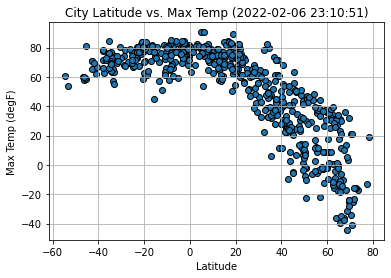

In [173]:
x_axis = clean_data['Lat']
y_axis = clean_data['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'City Latitude vs. Max Temp ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

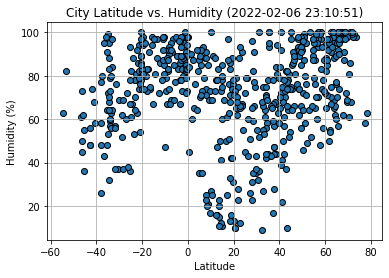

In [174]:
x_axis = clean_data['Lat']
y_axis = clean_data['Humidity']
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

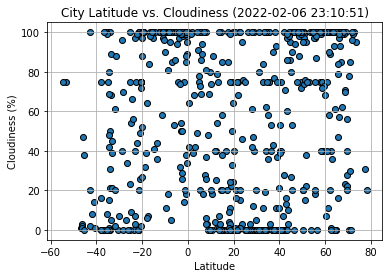

In [175]:
x_axis = clean_data['Lat']
y_axis = clean_data['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

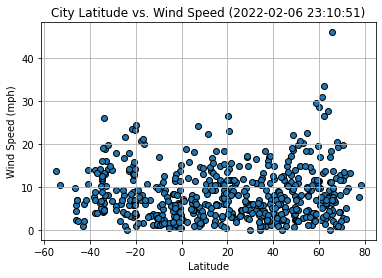

In [176]:
x_axis = clean_data['Lat']
#Convet from m/s to mph
y_axis = clean_data['Wind Speed'] * 2.23694
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date[0]})')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0       6.870304
1      61.789588
3      34.279684
4      -3.073787
6      53.356974
         ...    
550    73.146777
551    82.931102
552    72.392312
556    18.322924
557    24.256246
Name: Lat, Length: 368, dtype: float64
y = -1.34x +91.38
The r-value is: 0.7132659530742983


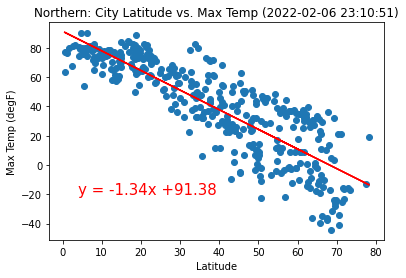

In [179]:
northern = clean_data.drop(clean_data[clean_data['Lat'] < 0].index, inplace=False)

x_axis = northern['Lat']
y_axis = northern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'Northern: City Latitude vs. Max Temp ({date[0]})')
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

2      67.142482
5      77.205910
7      69.790576
11     71.081335
15     69.923641
         ...    
546    72.833148
549    76.540255
553    75.133569
554    71.623887
555    72.866063
Name: Lat, Length: 190, dtype: float64
y = 0.22x +77.37
The r-value is: 0.1592028511327138


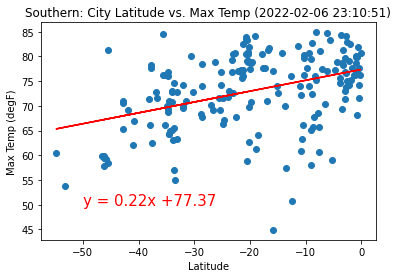

In [226]:
southern = clean_data.drop(clean_data[clean_data['Lat'] >= 0].index, inplace=False)

x_axis = southern['Lat']
y_axis = southern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'Southern: City Latitude vs. Max Temp ({date[0]})')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      82.020528
1      62.389250
3      72.222855
4      85.575113
6      65.403546
         ...    
550    58.329544
551    54.832069
552    58.599233
556    77.926710
557    75.805803
Name: Lat, Length: 368, dtype: float64
y = 0.48x +51.81
The r-value is: 0.16744844888066845


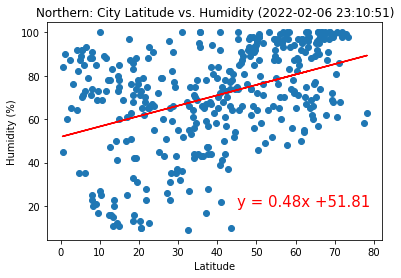

In [227]:
x_axis = northern['Lat']
y_axis = northern['Humidity']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern: City Latitude vs. Humidity ({date[0]})')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

2      67.142482
5      77.205910
7      69.790576
11     71.081335
15     69.923641
         ...    
546    72.833148
549    76.540255
553    75.133569
554    71.623887
555    72.866063
Name: Lat, Length: 190, dtype: float64
y = 0.22x +77.37
The r-value is: 0.1592028511327138


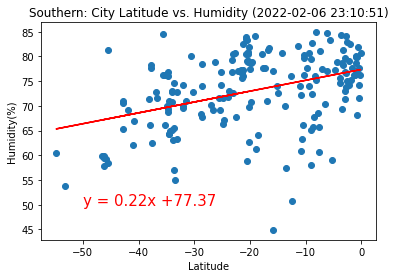

In [228]:
x_axis = southern['Lat']
y_axis = southern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'Southern: City Latitude vs. Humidity ({date[0]})')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      68.206137
1      45.379481
3      56.813700
4      72.339300
6      48.884413
         ...    
550    40.658978
551    36.592220
552    40.972564
556    63.445969
557    60.979842
Name: Lat, Length: 368, dtype: float64
y = 0.56x +33.08
The r-value is: 0.07762569703634495


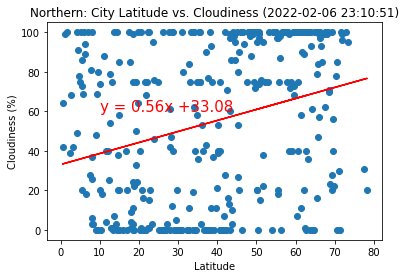

In [229]:
x_axis = northern['Lat']
y_axis = northern['Cloudiness']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern: City Latitude vs. Cloudiness ({date[0]})')
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      24.373299
5      86.850188
7      40.813489
11     48.826920
15     41.639599
         ...    
546    59.702719
549    82.717595
553    73.984450
554    52.195253
555    59.907066
Name: Lat, Length: 190, dtype: float64
y = 1.36x +87.86
The r-value is: 0.2343647382855814


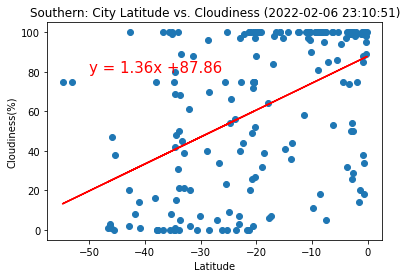

In [230]:
x_axis = southern['Lat']
y_axis = southern['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'Southern: City Latitude vs. Cloudiness ({date[0]})')
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      4.046733
1      3.564255
3      3.805935
4      4.134093
6      3.638338
         ...   
550    3.464480
551    3.378523
552    3.471108
556    3.946119
557    3.893993
Name: Lat, Length: 368, dtype: float64
y = 0.01x +3.3
The r-value is: 0.007209457110951249


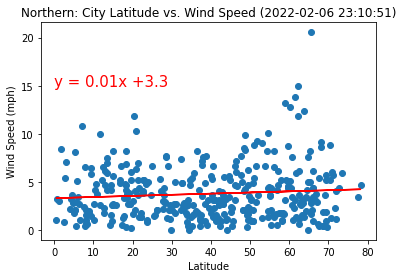

In [231]:
x_axis = northern['Lat']
y_axis = northern['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern: City Latitude vs. Wind Speed ({date[0]})')
plt.annotate(line_eq,(0, 15),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2      4.824832
5      2.414285
7      4.190520
11     3.881337
15     4.158646
         ...   
546    3.461716
549    2.573733
553    2.910684
554    3.751377
555    3.453832
Name: Lat, Length: 190, dtype: float64
y = -0.05x +2.38
The r-value is: 0.08383678055312331


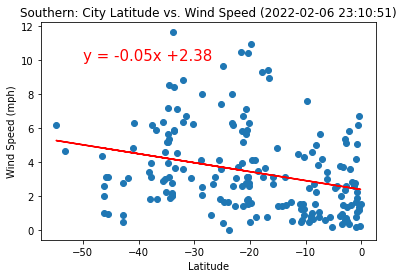

In [232]:
x_axis = southern['Lat']
y_axis = southern['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern: City Latitude vs. Wind Speed ({date[0]})')
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.show()